<a href="https://colab.research.google.com/github/lucdekeijzer/Assignment_3_Spaceship_Titanic/blob/main/Assignment_3_Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
dataset = 'spaceship-titanic'

!kaggle competitions download -c $dataset

zip_file = f"{dataset}.zip"
destination_dir = f"/content/{dataset}"

if not os.path.exists(zip_file):
    print(f"Error: {zip_file} not found.")
else:
    !unzip -q $zip_file -d $destination_dir
    !rm $zip_file

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 70.2MB/s]


In [3]:
# used for debugging
!pip install -Uqq ipdb
import ipdb
%pdb on
#ipdb.set_trace()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00
Automatic pdb calling has been turned ON


In [4]:
import pandas as pd


train_data_df = pd.read_csv("/content/spaceship-titanic/train.csv")
test_data_df = pd.read_csv("/content/spaceship-titanic/test.csv")
print(train_data_df)



     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

In [5]:
train_data_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

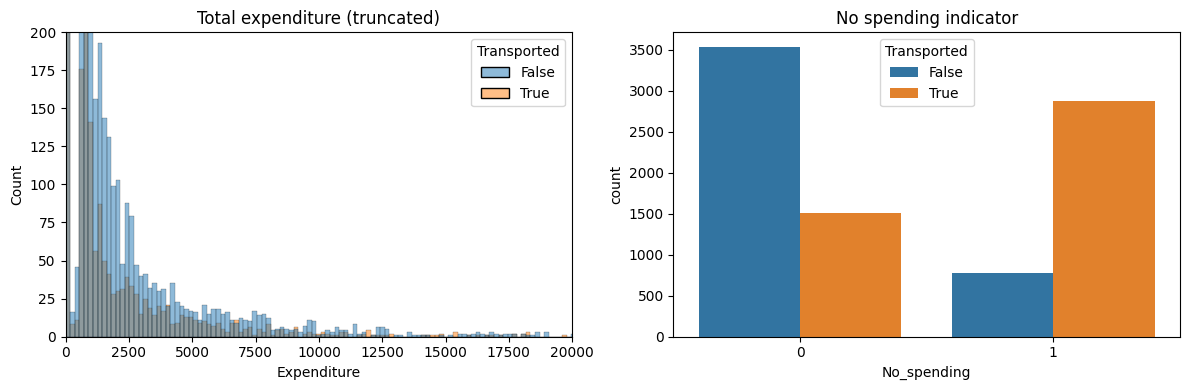

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

#added the features expenditure and no spending which is based on the persons spendings on the ship
train_data_df['Expenditure']=train_data_df[exp_feats].sum(axis=1)
train_data_df['No_spending']=(train_data_df['Expenditure']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=train_data_df, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=train_data_df, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()

In [8]:
print(len(train_data_df))
train_data_df_filled_na = train_data_df.fillna(method = "ffill")
print(len(train_data_df))

8693
8693


In [9]:
train_data_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Expenditure       0
No_spending       0
dtype: int64

In [10]:
print(train_data_df_filled_na.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
Expenditure     float64
No_spending       int64
dtype: object


In [11]:
len(train_data_df_filled_na)

X = train_data_df_filled_na.loc[:, train_data_df.columns != 'Transported']
y = train_data_df_filled_na['Transported']


In [12]:
# Encoding
from sklearn.preprocessing import LabelEncoder

# Encoding
# from sklearn.preprocessing import OneHotEncoder
# oneHotEncoder = OneHotEncoder(handle_unknown='ignore')
# # encode the entire training dataset
# columns_to_encode = ["PassengerId", "HomePlanet", "Destination", "Cabin", "Name"]
# oneHotEncoder.fit(X[columns_to_encode])
# # encode the specified columns individually
# X[columns_to_encode] = oneHotEncoder.transform(X[columns_to_encode])

label_encoder = LabelEncoder()
X['PassengerId'] = label_encoder.fit_transform(X['PassengerId'])
X["HomePlanet"] = label_encoder.fit_transform(X["HomePlanet"])
X['Destination'] = label_encoder.fit_transform(X['Destination'])
X['Cabin'] = label_encoder.fit_transform(X['Cabin'])
X['Name'] = label_encoder.fit_transform(X['Name'])
print(X)

      PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0               0           1      False    149            2  39.0  False   
1               1           0      False   2184            2  24.0  False   
2               2           1      False      1            2  58.0   True   
3               3           1      False      1            2  33.0  False   
4               4           0      False   2186            2  16.0  False   
...           ...         ...        ...    ...          ...   ...    ...   
8688         8688           1      False    146            0  41.0   True   
8689         8689           0       True   5280            1  18.0  False   
8690         8690           0      False   5285            2  26.0  False   
8691         8691           1      False   2131            0  32.0  False   
8692         8692           1      False   2131            2  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Name  Expenditu

<ipython-input-12-1ab09f2cd358>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PassengerId'] = label_encoder.fit_transform(X['PassengerId'])
<ipython-input-12-1ab09f2cd358>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["HomePlanet"] = label_encoder.fit_transform(X["HomePlanet"])
<ipython-input-12-1ab09f2cd358>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [13]:
print(X.dtypes)

PassengerId       int64
HomePlanet        int64
CryoSleep          bool
Cabin             int64
Destination       int64
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name              int64
Expenditure     float64
No_spending       int64
dtype: object


In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3)

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print(X_train["RoomService"].shape)


# Initialize StandardScaler
scaler = StandardScaler()

columns_to_transform = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# Fit scaler to the entire training dataset
scaler.fit(X_train[columns_to_transform])

# Transform both Train and Validation data
X_train[columns_to_transform] = scaler.transform(X_train[columns_to_transform])
X_val[columns_to_transform] = scaler.transform(X_val[columns_to_transform])


(6085,)


In [16]:
# Perform PCA

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# pca = PCA()  # initializing the pca
# pca.set_params(n_components = .99)    # configure the number of components
# X_train = pca.fit_transform(X_train)
# X_val = pca.transform(X_val)

classifier = SVC()

classifier.fit(X_train, y_train)

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize SVC
svc = SVC()

svc.fit(X_train, y_train)


# Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3)

# # Perform grid search on training data
# grid_search.fit(X_train[:50], y_train[:50])

# # Print best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)


SVC()

In [17]:
print(svc.score(X_train, y_train))
print(svc.score(X_val, y_val))

0.7288414133114215
0.7373466257668712


In [18]:
print(classifier.score(X_train, y_train))
print(classifier.score(X_val, y_val))

0.7288414133114215
0.7373466257668712


In [19]:
model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

prediction = model.predict(X_val)

correct_pred = (prediction == y_val).sum()
total_pred = len(y_val)

acc = correct_pred/total_pred
print("Accuracy:", acc)

Accuracy: 0.7868098159509203


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


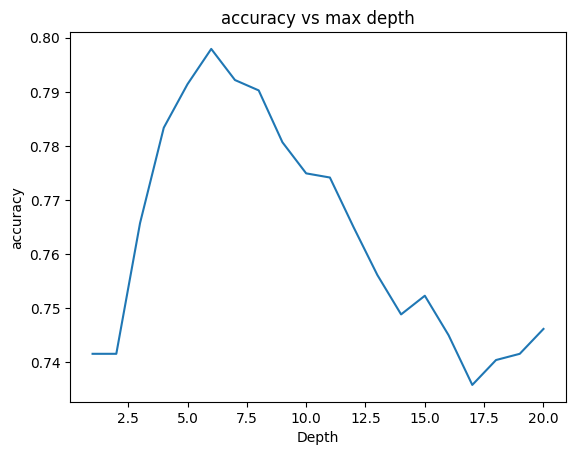

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

acc = []
depth = [i for i in range(1, 21)]

for d in depth:
    model = DecisionTreeClassifier(random_state = 42, max_depth=d)
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    correct_pred = (prediction == y_val).sum()
    total_pred = len(y_val)

    acc.append(correct_pred/total_pred)


plt.plot(depth, acc)
plt.xlabel("Depth")
plt.ylabel("accuracy")
plt.title("accuracy vs max depth")
plt.show()



In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, max_depth=10)
model.fit(X_train, y_train)

prediction = model.predict(X_val)
correct_pred = (prediction == y_val).sum()
total_pred = len(y_val)

acc = (correct_pred/total_pred)
print("Accuracy:", acc)

Accuracy: 0.807898773006135


In [23]:
from sklearn.ensemble import RandomForestClassifier



# randomforest with gridsearch

model = RandomForestClassifier(random_state=42)


param_grid = {
  'max_depth': [10, 15, 18],
  'n_estimators': [200, 250, 350, 400],  # Number of trees in the forest
  'criterion': ['gini', 'entropy']
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)



Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 350}
Best Accuracy: 0.7893179950698439


In [26]:
from sklearn.ensemble import GradientBoostingClassifier


model = GradientBoostingClassifier(max_depth=7, random_state=42)
model.fit(X_train, y_train)

print(model.score(X_val, y_val))

importances = model.feature_importances_

feature_names = train_data_df.columns.tolist()

importance_feature_pairs = zip(importances, feature_names)

# Sort the pairs based on importance values in ascending order
sorted_pairs = sorted(importance_feature_pairs)

# Print the sorted feature importances
for importance, feature_name in sorted_pairs:
    print(f"{feature_name}: importance = {importance}")

0.808282208588957
VIP: importance = 0.00036858193972776337
Destination: importance = 0.011183127307979388
CryoSleep: importance = 0.01384140031894986
RoomService: importance = 0.03356009041979762
HomePlanet: importance = 0.045124278625026014
Age: importance = 0.045785196991516806
VRDeck: importance = 0.0551695199256937
Spa: importance = 0.056346935801845036
Name: importance = 0.06289034654425743
PassengerId: importance = 0.06592963809902411
ShoppingMall: importance = 0.06909831038740716
FoodCourt: importance = 0.08734329919984984
Cabin: importance = 0.11452789294660162
Transported: importance = 0.11519679187521503
Expenditure: importance = 0.22363458961710858


<ipython-input-25-7cca1327c9d6>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


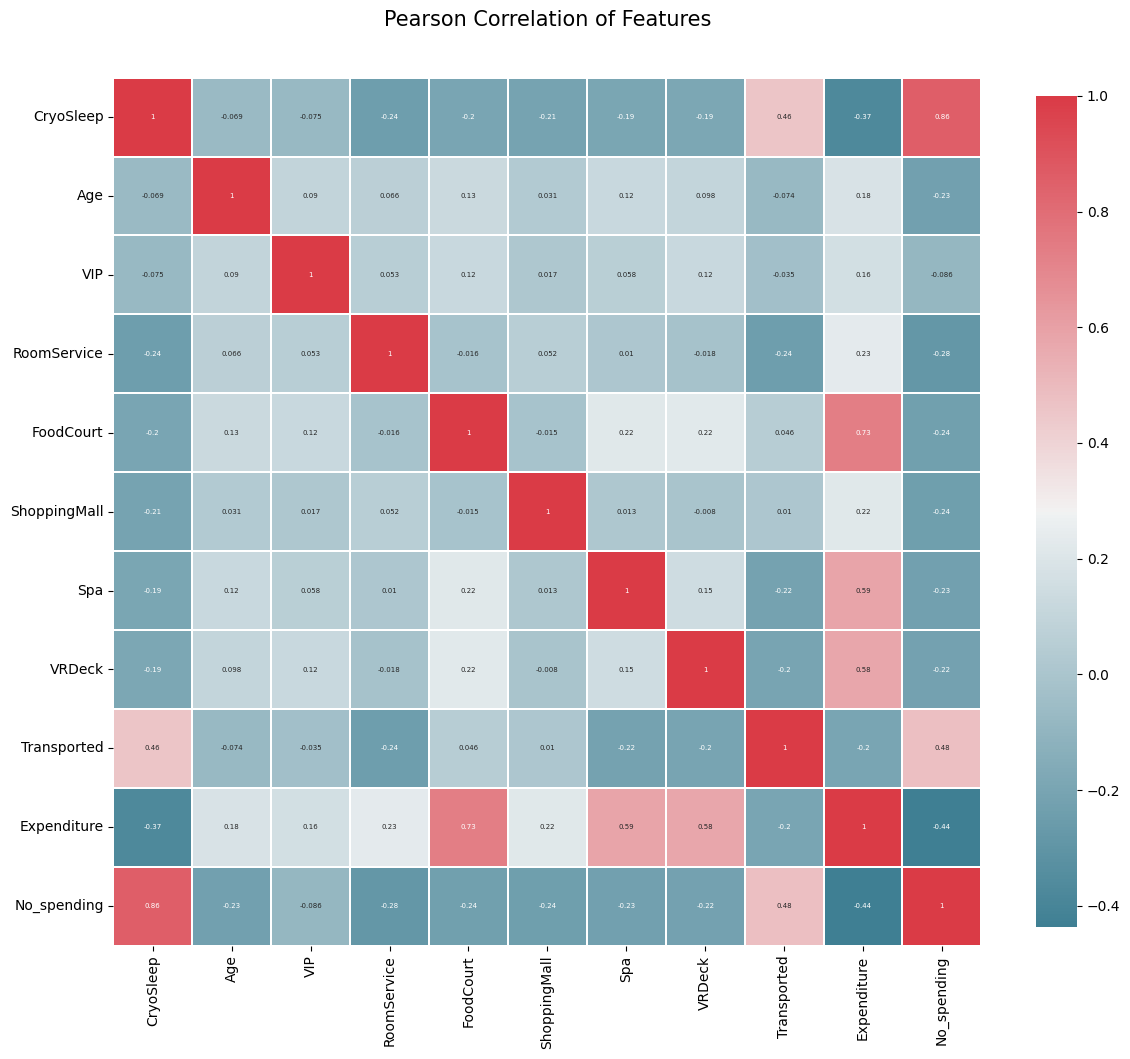

In [25]:
import seaborn as sns
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize': 5 }
    )

    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_data_df_filled_na)